In [1]:
#pip install pyod

In [2]:
# Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Função para gerar dados
from pyod.utils.data import generate_data

In [4]:
# Gerar dados aleatórios com 2 eixos
X_Treino, Y_Treino = generate_data( n_train=1000,train_only=True, n_features=2 )

In [5]:
# Seprar os valores em 2 eixo e ajustar o eixo
Eixo_X = X_Treino[:,[0] ].reshape(-1, 1)
Eixo_Y = X_Treino[:,[1] ].reshape(-1, 1)

In [6]:
# Criar uma Tabela
Tabela = pd.DataFrame( Eixo_X, columns=['Eixo X'])
Tabela['Eixo Y'] = Eixo_Y
Tabela['Classe'] = Y_Treino

In [7]:
# Verificando
Tabela.head()

,Eixo X,Eixo Y,Classe
0,3.240661,3.697931,0.0
1,2.498859,3.402286,0.0
2,2.716834,4.218014,0.0
3,1.830771,1.943820,0.0
4,2.602125,2.344553,0.0


In [8]:
# Divisão dos Outliers
Tabela.Classe.value_counts( normalize=True ) * 100

Classe
0.0    90.0
1.0    10.0
Name: proportion, dtype: float64

<Axes: title={'left': 'Analisando os valore gerados'}, xlabel='Eixo X', ylabel='Eixo Y'>

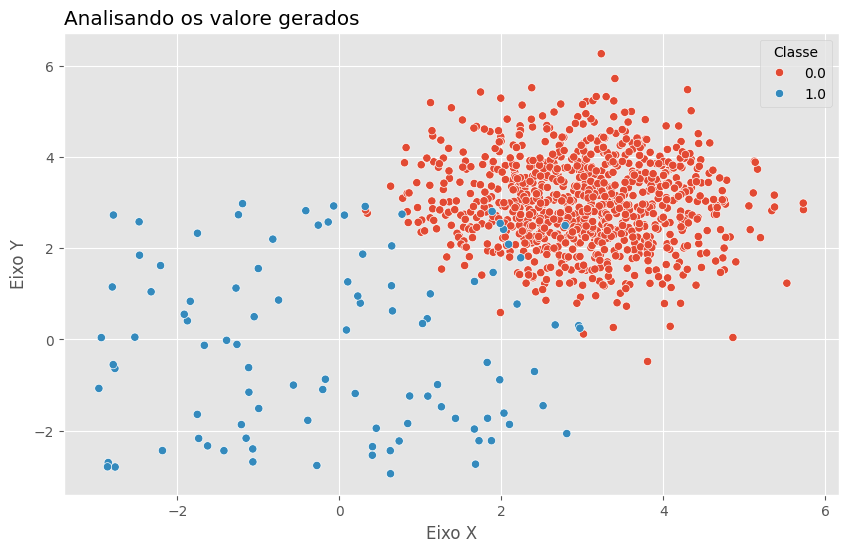

In [9]:
# Estilo
plt.style.use('ggplot')

# Tamanho da imagem
plt.figure( figsize=(10, 6) )

# Titulo do grafico
plt.title('Analisando os valore gerados', loc='left')

# Plot com os parametros
sns.scatterplot( data=Tabela, x='Eixo X', y='Eixo Y', hue='Classe' )

/tmp/ipykernel_567641/3990064618.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( data=Tabela, y='Eixo Y', width=0.35, palette='husl' );


<Axes: title={'left': 'Eixo X'}, ylabel='Eixo X'>

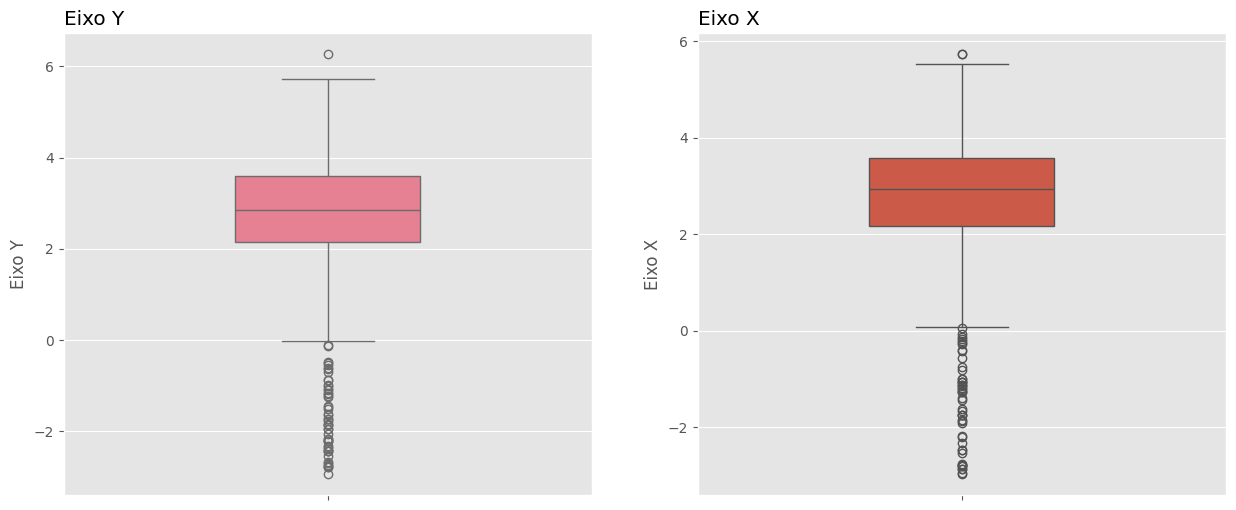

In [10]:
# Tamanho da imagem
plt.figure( figsize=(15, 6) )

# Grid 1
plt.subplot(1, 2, 1)

# Titulo do grafico
plt.title('Eixo Y', loc='left')

# Plot com os parametros
sns.boxplot( data=Tabela, y='Eixo Y', width=0.35, palette='husl' );

# Grid 2
plt.subplot(1, 2, 2)

# Titulo do grafico
plt.title('Eixo X', loc='left')

# Plot com os parametros
sns.boxplot( data=Tabela, y='Eixo X', width=0.35 )

In [11]:
# Função KNN
from pyod.models.knn import KNN

# Instanciando o modelo
Modelo_KNN = KNN(contamination=0.1,
                 n_neighbors=5,
                 method='largest',
                 radius=1.0,
                 algorithm='auto',
                 leaf_size=30,
                 metric='minkowski',
                 p=2,
                 metric_params=None,
                 n_jobs=1)
# Fitando o modelo
Modelo_KNN.fit( Tabela.iloc[:,0:2] )

# Fazendo previções
Previsoes = Modelo_KNN.labels_

# Gerando analises
Analise = np.unique( Previsoes, return_counts=True )
Confianca = Modelo_KNN.decision_scores_

# Criando novos dados na Tabela
Tabela['Classificação'] = Previsoes
Tabela['Confiança'] = Confianca

# Verificando
print(f'Verificando as classificações: { Analise }')

Verificando as classificações: (array([0, 1]), array([900, 100]))


<Axes: title={'left': 'Analise Modelo'}, xlabel='Eixo X', ylabel='Eixo Y'>

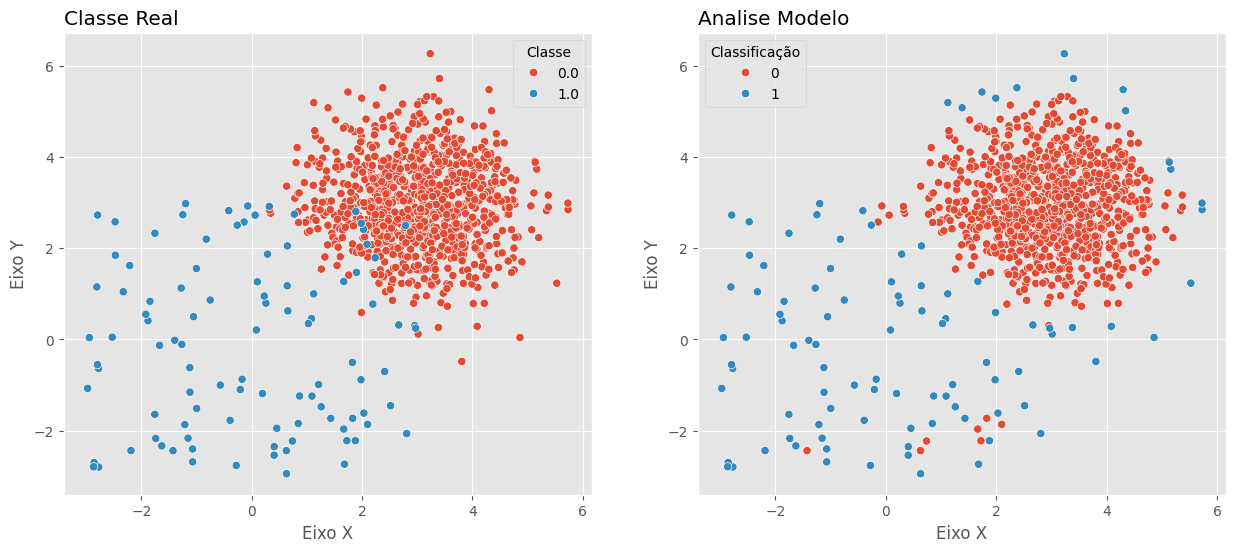

In [12]:
# Estilo
plt.style.use('ggplot')

# Tamanho da imagem
plt.figure( figsize=(15, 6) )

# Grid
plt.subplot(1, 2, 1)
plt.title('Classe Real', loc='left')
sns.scatterplot( data=Tabela, x='Eixo X', y='Eixo Y', hue='Classe' )
plt.subplot(1, 2, 2)
plt.title('Analise Modelo', loc='left')
sns.scatterplot( data=Tabela, x='Eixo X', y='Eixo Y', 
                hue='Classificação' )